# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [15]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [16]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(m, int) or not isinstance(n, int) or m <= 0 or n <= 0:
        return None
    t = np.linspace(0, 1, num=m)
    A = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            A[i, j] = t[i] ** j
    b = np.cos(4 * t)
    return A, b

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [17]:
def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.ndim != 2 or b.ndim != 1:
        return None
    m, n = A.shape
    if b.shape[0] != m:
        return None
    A_new = A.T @ A
    b_new = A.T @ b
    return A_new, b_new

def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    if not isinstance(A, np.ndarray) or not isinstance(x, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.ndim != 2 or x.ndim != 1 or b.ndim != 1:
        return None
    m, n = A.shape
    if x.shape[0] != n or b.shape[0] != m:
        return None
    r = b - A @ x
    return np.linalg.norm(r)

In [18]:
# ===== Twoja implementacja tutaj =====
A, b = spare_matrix_Abt(50, 12)
#1.
def solve(m, v):
    Aq, bq = main.square_from_rectan(m, v)
    res = np.linalg.solve(Aq, bq)
    return res
x1 = solve(A, b)
residuum_x1 = residual_norm(A, x1, b)
saved_time1 = %timeit -r 10 -n 100 -o solve(A, b)
saved_mem1 = %memit -o  solve(A, b)
print('Norma residuum:', residuum_x1)
# 2.
def lstsq(m, v):
    res = np.linalg.lstsq(m, v, rcond=-1)[0]
    return res
x2 = lstsq(A, b)
residuum_x2 = residual_norm(A, x2, b)
saved_time2 = %timeit -r 10 -n 100 -o lstsq(A, b)
saved_mem2 = %memit -o lstsq(A, b)
print('Norma residuum:', residuum_x2)
# 3.
def qr(m, v):
    q, r = np.linalg.qr(m)
    res = sp.linalg.solve_triangular(r, q.T @ v)
    return res
x3 = qr(A, b)
residuum_x3 = residual_norm(A, x3, b)
saved_time3 = %timeit -r 10 -n 100 -o qr(A, b)
saved_mem3 = %memit -o qr(A, b)
print('Norma residuum:', residuum_x3)
# 4.
def svd(m, v):
    U, S, V = np.linalg.svd(m, full_matrices=False)
    S = np.diag(S)
    res = V.T @ np.linalg.solve(S, U.T @ v)
    return res
x4 = svd(A, b)
residuum_x4 = residual_norm(A, x4, b)
saved_timing4 = %timeit -r 10 -n 100 -o svd(A, b)
saved_mem4 = %memit -o svd(A, b)
print('Norma residuum:', residuum_x4)

23.1 μs ± 6.42 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 126.04 MiB, increment: 0.00 MiB
Norma residuum: 4.319494884976925e-08
46.5 μs ± 6.29 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 123.57 MiB, increment: 0.00 MiB
Norma residuum: 7.999154244799335e-09
120 μs ± 21.5 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 123.77 MiB, increment: 0.00 MiB
Norma residuum: 7.999154991258816e-09
112 μs ± 37.3 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 123.83 MiB, increment: 0.00 MiB
Norma residuum: 7.999153609697088e-09


In [19]:
# Przykładowa forma zestawienia wyników
# print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
# print(f"Pierwsza metoda :  {np.linalg.norm(x1):.3e}")
# print(f"Druga metoda    :  {np.linalg.norm(x2):.3e}")
# print(f"Trzecia metoda  :  {np.linalg.norm(x3):.3e}")
# print(f"Czwarta metoda  :  {np.linalg.norm(x4):.3e}")
# print("")
# print("Czas wykonywania dla kolejnych metod obliczeń:")
# print(f"Pierwsza metoda :  {str(time[0])[:29]}")
# print(f"Druga metoda    :  {str(time[1])[:29]}")
# print(f"Trzecia metoda  :  {str(time[2])[:29]}")
# print(f"Czwarta metoda  :  {str(time[3])[:29]}")
# print("")
# print("Użyta pamięć dla kolejnych metod obliczeń:")
# print(f"Pierwsza metoda :  {str(memory[0])}")
# print(f"Druga metoda    :  {str(memory[1])}")
# print(f"Trzecia metoda  :  {str(memory[2])}")
# print(f"Czwarta metoda  :  {str(memory[3])}")

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [20]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

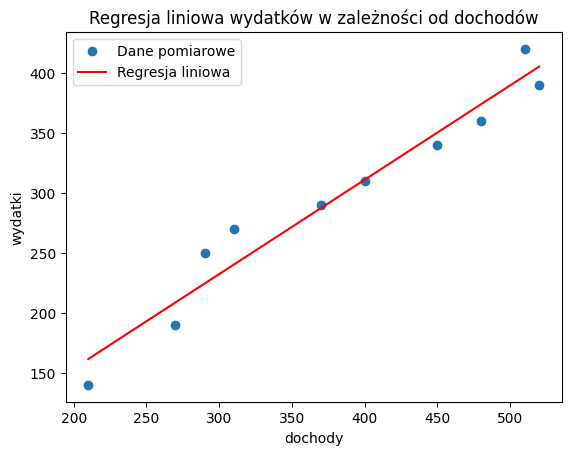

Błąd uzyskanej regresji liniowej: [array([-21.57710832]), array([-18.74303523]), array([25.53498914]), array([29.8130135]), array([2.6470866]), array([-0.93587685]), array([-10.24081594]), array([-13.82377939]), array([22.59325715]), array([-15.26773066])]
Współczynniki regresji liniowej: [-3.50363585  0.78609878]


In [21]:
# ===== Twoja implementacja tutaj =====
A = [[len(d), sum(d)], [sum(d), sum(d**2)]]
b = [[sum(w)], [sum(w * d)]]
x = np.linalg.solve(A, b)
plt.plot(d, w, 'o', label='Dane pomiarowe')
plt.plot(d, x[0] + x[1] * d, 'r-', label='Regresja liniowa')
plt.xlabel('dochody')
plt.ylabel('wydatki')
plt.title('Regresja liniowa wydatków w zależności od dochodów')
plt.legend()
plt.show()
err = [w[i] - x[0] - x[1] * d[i] for i in range(len(d))]
print('Błąd uzyskanej regresji liniowej:', err)
print('Współczynniki regresji liniowej:', x.flatten())

W tym przypadku ciężko o uzyskanie lepszego wyniku - wydatki rzeczywiście rosną niemalże liniowo wraz z dochodami więc regresja liniowa jest tu wystarczająco dobrym narzędziem oszacowania

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

Współczynniki b1: [2.02195167 1.00435297]


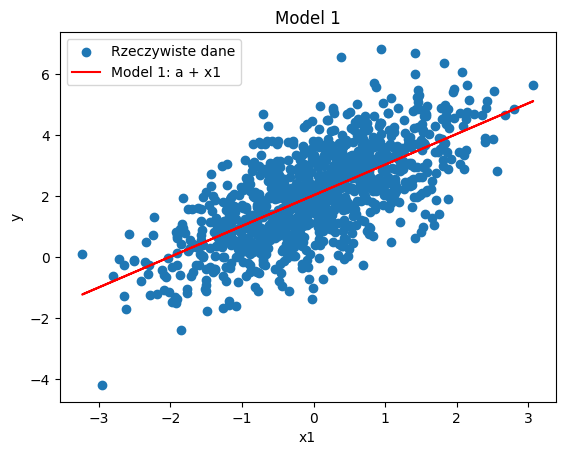

Współczynniki b2: [ 2.04132327 -0.51502305]


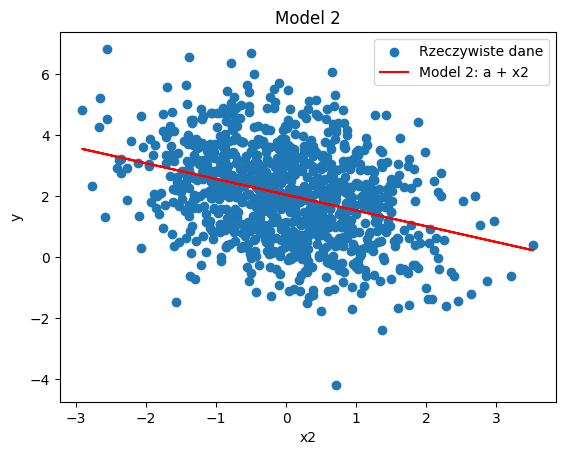

Współczynniki b3: [ 2.0262955   1.00716304 -0.52071256]


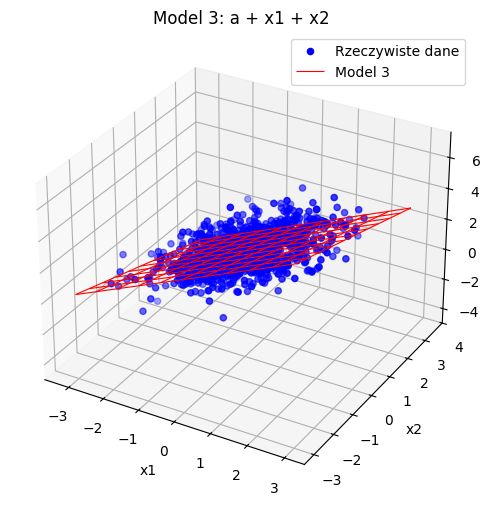

Współczynniki b4: [ 2.02614061  1.00668862 -0.5197026   0.02637386]
Norma residuum modelu 1: 35.74864790324132
Norma residuum modelu 2: 45.5504859407542
Norma residuum modelu 3: 31.697012786240386
Norma residuum modelu 4: 31.685074565786657


In [40]:
# ===== Twoja implementacja tutaj =====
#1.
x1 = np.random.normal(0, 1, (1000,))
x2 = np.random.normal(0, 1, (1000,))
eps = np.random.normal(0, 1, (1000,))
y = 2 +  x1 - 0.5 * x2 + eps
#2.1. y = b0 * 1 + b1 * x1
Z1 = np.concatenate((np.ones_like(x1).reshape(-1, 1), x1.reshape(-1, 1)), axis=1)
Q, R = np.linalg.qr(Z1)
b1 = np.linalg.solve(R, Q.T @ y)
print("Współczynniki b1:", b1.ravel())
y_pred1 = Z1 @ b1
plt.scatter(x1, y, label='Rzeczywiste dane')
plt.plot(x1, y_pred1, 'r', label='Model 1: a + x1')
plt.legend(); plt.xlabel('x1'); plt.ylabel('y'); plt.title('Model 1')
plt.show()
#2.2. y = b0 * 1 + b1 * x2
Z2 = np.concatenate((np.ones_like(x2).reshape(-1, 1), x2.reshape(-1, 1)), axis=1)
Q, R = np.linalg.qr(Z2)
b2 = np.linalg.solve(R, Q.T @ y)
print("Współczynniki b2:", b2.ravel())
y_pred2 = Z2 @ b2
plt.scatter(x2, y, label='Rzeczywiste dane')
plt.plot(x2, y_pred2, 'r', label='Model 2: a + x2')
plt.legend(); plt.xlabel('x2'); plt.ylabel('y'); plt.title('Model 2')
plt.show()
#2.3. y = b0 * 1 + b1 * x1 + b2 * x2
Z3 = np.concatenate((np.ones_like(x1).reshape(-1, 1), x1.reshape(-1, 1), x2.reshape(-1, 1)), axis=1)
Q, R = np.linalg.qr(Z3)
b3 = np.linalg.solve(R, Q.T @ y)
y_pred3 = Z3 @ b3
print("Współczynniki b3:", b3.ravel())
x1_grid, x2_grid = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
y_grid = b3[0] + b3[1]*x1_grid + b3[2]*x2_grid
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', label='Rzeczywiste dane')
ax.plot_wireframe(x1_grid, x2_grid, y_grid, color='r', label='Model 3', rstride=100, cstride=100, linewidth=0.8)
ax.set_xlabel('x1'); ax.set_ylabel('x2'); ax.set_zlabel('y')
plt.title('Model 3: a + x1 + x2')
plt.legend()
plt.show()
#2.4. y = b0 * 1 + b1 * x1 + b2 * x2 + b3 * x1 * x2
Z4 = np.concatenate((np.ones_like(x1).reshape(-1, 1), x1.reshape(-1, 1), x2.reshape(-1, 1), (x1 * x2).reshape(-1, 1)), axis=1)
Q, R = np.linalg.qr(Z4)
b4 = np.linalg.solve(R, Q.T @ y)
print("Współczynniki b4:", b4.ravel())
# Normy residuum
residuum1 = residual_norm(Z1, b1, y)
residuum2 = residual_norm(Z2, b2, y)
residuum3 = residual_norm(Z3, b3, y)
residuum4 = residual_norm(Z4, b4, y)
print('Norma residuum modelu 1:', residuum1)
print('Norma residuum modelu 2:', residuum2)
print('Norma residuum modelu 3:', residuum3)
print('Norma residuum modelu 4:', residuum4)

Modele 3 i 4 mają najmniejszą normę residuum więc najlepiej opisują badany problem. Różnica między nimi jest niewielka więc model 3. jest wystarczający, ponieważ jest prostszy od modelu 4.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)